In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Укажите путь к файлу xlsx
xlsx_file_path = "example.xlsx"

# Прочитайте файл xlsx в DataFrame
df = pd.read_excel(xlsx_file_path)

X = df['X']
Y = df['Y']
Z = df['Z']
D = df['D']

In [9]:
# Колмогоров-Смирнов тест для нормального распределения
ks_statistic_X, ks_pvalue_X = stats.kstest(X, 'norm', args=(X.mean(), X.std()))
ks_statistic_Y, ks_pvalue_Y = stats.kstest(Y, 'norm', args=(Y.mean(), Y.std()))
ks_statistic_Z, ks_pvalue_Z = stats.kstest(Z, 'norm', args=(Z.mean(), Z.std()))
ks_statistic_D, ks_pvalue_D = stats.kstest(D, 'norm', args=(D.mean(), D.std()))

print(f"KS test for X (normal): statistic={ks_statistic_X}, p-value={ks_pvalue_X}")
print(f"KS test for Y (normal): statistic={ks_statistic_Y}, p-value={ks_pvalue_Y}")

print(f"KS test for Z (normal): statistic={ks_statistic_Z}, p-value={ks_pvalue_Z}")
print(f"KS test for D (normal): statistic={ks_statistic_D}, p-value={ks_pvalue_D}")
# Выводы по результатам тестов
alpha = 0.05
if ks_pvalue_X < alpha:
    print("Гипотеза о нормальном распределении X отвергается")
else:
    print("Гипотеза о нормальном распределении X не отвергается")

if ks_pvalue_Y < alpha:
    print("Гипотеза о нормальном распределении Y отвергается")
else:
    print("Гипотеза о нормальном распределении Y не отвергается")

if ks_pvalue_Z < alpha:
    print("Гипотеза о нормальном распределении Z отвергается")
else:
    print("Гипотеза о нормальном распределении Z не отвергается")

if ks_pvalue_D < alpha:
    print("Гипотеза о нормальном распределении D отвергается")
else:
    print("Гипотеза о нормальном распределении D не отвергается")


KS test for X (normal): statistic=0.08531409319640998, p-value=0.10260887852786338
KS test for Y (normal): statistic=0.08852268726983759, p-value=0.0818774378282563
KS test for Z (normal): statistic=0.03701671447372634, p-value=0.9373639241505186
KS test for D (normal): statistic=0.04950094422191759, p-value=0.6921286443105663
Гипотеза о нормальном распределении X не отвергается
Гипотеза о нормальном распределении Y не отвергается
Гипотеза о нормальном распределении Z не отвергается
Гипотеза о нормальном распределении D не отвергается


In [11]:
# Хи-квадрат тест для Пуассоновского распределения
observed_counts, bins = np.histogram(X, bins='auto')
expected_counts = len(X) * np.diff(stats.poisson.cdf(bins, mu=X.mean()))

# Нормализация ожидаемых частот
expected_counts *= observed_counts.sum() / expected_counts.sum()

chi2_statistic, chi2_pvalue = stats.chisquare(observed_counts, f_exp=expected_counts)

print(f"Chi-square test for X (Poisson): statistic={chi2_statistic}, p-value={chi2_pvalue}")

if chi2_pvalue < alpha:
    print("Гипотеза о Пуассоновском распределении X отвергается")
else:
    print("Гипотеза о Пуассоновском распределении X не отвергается")


Chi-square test for X (Poisson): statistic=67.92056123161348, p-value=1.933614930324732e-09
Гипотеза о Пуассоновском распределении X отвергается


In [12]:
# Тест Колмогорова-Смирнова для нормального распределения Z
ks_statistic_Z, ks_pvalue_Z = stats.kstest(Z, 'norm', args=(Z.mean(), Z.std()))
print(f"KS test for Z (normal): statistic={ks_statistic_Z}, p-value={ks_pvalue_Z}")

if ks_pvalue_Z < alpha:
    print("Гипотеза о нормальном распределении Z отвергается")
else:
    print("Гипотеза о нормальном распределении Z не отвергается")

# Тест Колмогорова-Смирнова для нормального распределения D
ks_statistic_D, ks_pvalue_D = stats.kstest(D, 'norm', args=(D.mean(), D.std()))
print(f"KS test for D (normal): statistic={ks_statistic_D}, p-value={ks_pvalue_D}")

if ks_pvalue_D < alpha:
    print("Гипотеза о нормальном распределении D отвергается")
else:
    print("Гипотеза о нормальном распределении D не отвергается")

# Тест Колмогорова-Смирнова для равномерного распределения Y
ks_statistic_Y, ks_pvalue_Y = stats.kstest(Y, 'uniform', args=(Y.min(), Y.max()-Y.min()))
print(f"KS test for Y (uniform): statistic={ks_statistic_Y}, p-value={ks_pvalue_Y}")

if ks_pvalue_Y < alpha:
    print("Гипотеза о равномерном распределении Y отвергается")
else:
    print("Гипотеза о равномерном распределении Y не отвергается")


KS test for Z (normal): statistic=0.03701671447372634, p-value=0.9373639241505186
Гипотеза о нормальном распределении Z не отвергается
KS test for D (normal): statistic=0.04950094422191759, p-value=0.6921286443105663
Гипотеза о нормальном распределении D не отвергается
KS test for Y (uniform): statistic=0.04778545860688088, p-value=0.732512122073677
Гипотеза о равномерном распределении Y не отвергается


In [14]:
# Хи-квадрат тест для Пуассоновского распределения X
observed_counts, bins = np.histogram(X, bins='auto')
expected_counts = len(X) * np.diff(stats.poisson.cdf(bins, mu=X.mean()))

# Нормализация ожидаемых частот
expected_counts *= observed_counts.sum() / expected_counts.sum()

chi2_statistic, chi2_pvalue = stats.chisquare(observed_counts, f_exp=expected_counts)

print(f"Chi-square test for X (Poisson): statistic={chi2_statistic}, p-value={chi2_pvalue}")

alpha = 0.05
if chi2_pvalue < alpha:
    print("Гипотеза о Пуассоновском распределении X отвергается")
else:
    print("Гипотеза о Пуассоновском распределении X не отвергается")


Chi-square test for X (Poisson): statistic=67.92056123161348, p-value=1.933614930324732e-09
Гипотеза о Пуассоновском распределении X отвергается


In [21]:
from scipy.stats import chisquare
from scipy.stats import poisson
# Define the expected frequencies for Poisson distribution
lambda_X = X.mean()
expected_freqs = poisson.pmf(range(int(X.max())+1), lambda_X) * len(X)

# Chi-square test
obs_freqs, _ = np.histogram(X, bins=range(int(X.max())+2))
chi2_stat_X, p_value_X = chisquare(obs_freqs, expected_freqs)

print(f'Chi-square test for X (Poisson): statistic={chi2_stat_X}, p-value={p_value_X}')


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.0015721607138329905

In [15]:
t_statistic, t_pvalue = stats.ttest_ind(X, Y)
print(f"t-test for equality of means: statistic={t_statistic}, p-value={t_pvalue}")

if t_pvalue < alpha:
    print("Гипотеза о равенстве средних X и Y отвергается")
else:
    print("Гипотеза о равенстве средних X и Y не отвергается")

t-test for equality of means: statistic=30.6366470045653, p-value=9.554335422627212e-107
Гипотеза о равенстве средних X и Y отвергается


In [16]:
if t_pvalue >= alpha:
    combined = np.concatenate([X, Y])
    combined_mean = np.mean(combined)
    combined_std = np.std(combined)
    print(f"Объединенная выборка: среднее={combined_mean}, стандартное отклонение={combined_std}")
else:
    print("Выборки нельзя объединить")

Выборки нельзя объединить


In [23]:
from scipy.stats import ttest_ind

t_stat, p_value_ttest = ttest_ind(X, Y)

print(f'T-test for equality of means X and Y: statistic={t_stat}, p-value={p_value_ttest}')


if p_value_ttest < alpha:
    print("Гипотеза о равенстве распределений X и Y (критерий знаков) отвергается")
else:
    print("Гипотеза о равенстве распределений X и Y (критерий знаков) не отвергается")


T-test for equality of means X and Y: statistic=30.6366470045653, p-value=9.554335422627212e-107
Гипотеза о равенстве распределений X и Y (критерий знаков) отвергается


In [27]:
from scipy.stats import mannwhitneyu

u_stat, p_value_mannwhitney = mannwhitneyu(X, Y)

print(f'Mann-Whitney U test for X and Y: statistic={u_stat}, p-value={p_value_mannwhitney}')
if p_value_mannwhitney < alpha:
    print("Гипотеза о равенстве распределений X и Y (mannwhitneyu) отвергается")
else:
    print("Гипотеза о равенстве распределений X и Y (mannwhitneyu) не отвергается")

Mann-Whitney U test for X and Y: statistic=39604.0, p-value=1.4768098049370635e-64
Гипотеза о равенстве распределений X и Y (mannwhitneyu) отвергается


In [26]:
from scipy.stats import binomtest

diff = X - Y
n_positive = sum(diff > 0)
n_total = len(diff)

# Binomial test for the sign test
sign_test_result = binomtest(n_positive, n_total, p=0.5)

print(f'Sign test for X and Y: statistic={sign_test_result.statistic}, p-value={sign_test_result.pvalue}')

if sign_test_result.pvalue < alpha:
    print("Гипотеза о равенстве распределений X и Y (критерий знаков) отвергается")
else:
    print("Гипотеза о равенстве распределений X и Y (критерий знаков) не отвергается")


Sign test for X and Y: statistic=0.985, p-value=1.659679419208622e-54
Гипотеза о равенстве распределений X и Y (критерий знаков) отвергается


In [2]:
column_values = df["D"].tolist()

# Объедините значения в одну строку, разделяя их пробелами
column_as_string = ','.join(map(str, column_values))
print("Строка со значениями столбца", "D=",column_as_string)

Строка со значениями столбца D= 2.29106893237,2.26403892097,6.2446633167,4.93176295377,7.09973553507,5.84190076275,2.91330742621,2.57308785442,5.6869144632,3.93707283059,3.93264067442,1.23962711663,5.92816588081,0.581310339931,2.49878223168,4.42584857266,3.49898148888,6.21364616744,3.25898170282,1.94131808365,2.96677343358,0.659741263411,3.86031145306,9.3666796951,8.24459611291,4.09220004134,5.37452862445,3.13882468173,4.11122173603,0.821461514186,1.68323605285,4.19761005136,3.95725973395,2.8609219217,2.68274392059,2.4003848785,4.26325289,2.5649356191,3.43856907433,-0.538190802425,1.75420235677,7.71678561833,0.798787047917,2.4360008161,4.73973356807,6.82361363062,4.39184490587,4.3084153142,6.386130936,6.62243894369,6.45107547269,1.5908026934,4.21369497931,4.22386242803,2.04668932594,6.16359705613,3.00290165295,5.36868575955,5.45289249694,5.25748441637,0.854327294099,2.98104069695,-0.906781451662,6.01869463603,6.39252059987,5.32627669441,3.08171241758,1.55856342896,4.25735001619,4.58761

In [3]:
import numpy as np

X = np.array([5,7,7,10,12,14,6,13,13,11,11,7,15,12,12,12,7,11,10,11,11,11,10,3,12,6,10,10,7,11,8,12,3,7,12,7,4,13,11,7,9,15,9,9,12,11,10,9,11,3,12,8,9,13,14,9,14,8,8,8,8,11,13,8,11,16,5,17,7,20,8,10,8,8,7,12,16,13,11,9,7,11,13,13,6,12,7,7,8,8,6,15,11,14,7,11,6,5,7,6,15,8,10,7,10,12,8,13,13,15,11,11,9,14,9,11,8,14,14,7,10,15,10,10,7,7,9,13,11,15,11,13,16,9,5,10,6,9,3,10,11,5,5,13,13,9,12,12,11,9,10,10,8,5,8,8,10,9,12,5,11,16,13,11,11,13,12,10,7,13,2,17,6,6,13,9,7,12,18,8,8,12,15,12,17,8,6,16,6,11,10,8,14,7,6,9,10,10,6,9])

max_X = np.max(column_values)
min_X = np.min(column_values)
print(f"max Z: {max_X}")
print(f"min Z: {min_X}")

print(max_X - min_X)

max Z: 9.40034597862
min Z: -3.16290716318
12.5632531418


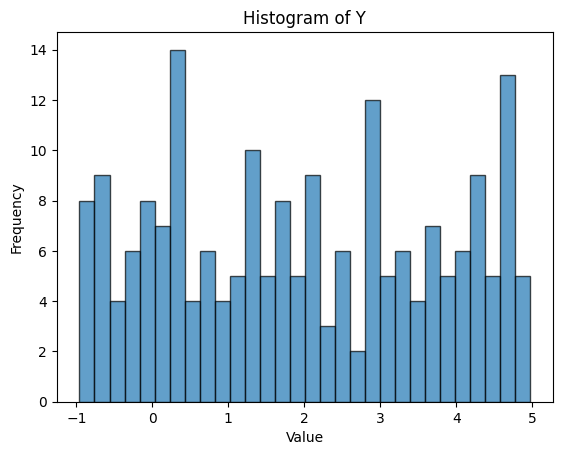

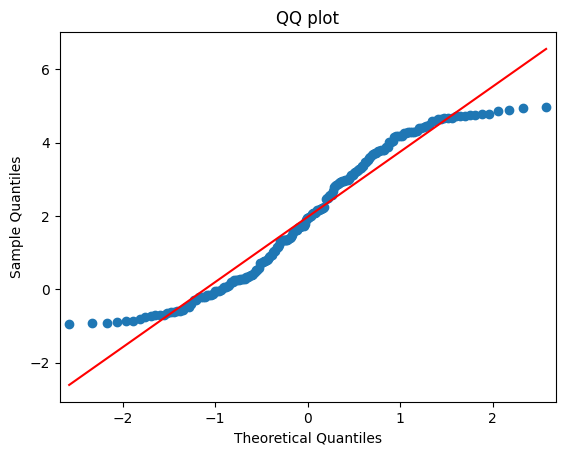

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ваши данные
Y = df["Y"]

# Построение гистограммы
plt.hist(Y, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Построение QQ-графика для нормального распределения
sm.qqplot(np.array(Y), line ='s')
plt.title('QQ plot')
plt.show()

In [32]:

# Основные числовые характеристики для каждой выборки
stats = df.describe()

# Мода для каждой выборки
modes = df.mode(axis=0)

# Коэффициенты асимметрии для каждой выборки
skewness = df.skew()

# Коэффициенты эксцесса для каждой выборки
kurtosis = df.kurtosis()

# Вывод результатов
print("Основные числовые характеристики:")
print(stats)
print("\nМода:")
print(modes)
print("\nКоэффициенты асимметрии:")
print(skewness)
print("\nКоэффициенты эксцесса:")
print(kurtosis)

Основные числовые характеристики:
                X           Y           Z           D
count  200.000000  200.000000  200.000000  200.000000
mean     9.990000    1.973704    1.075743    3.886346
std      3.242293    1.783375    3.886138    1.859615
min      2.000000   -0.960908   -8.928492   -3.162907
25%      8.000000    0.314313   -1.393858    2.813563
50%     10.000000    1.942471    1.158932    3.959655
75%     12.000000    3.583925    3.856398    5.080092
max     20.000000    4.976185   11.438908    9.400346

Мода:
        X         Y          Z         D
0    11.0 -0.960908  -8.928492 -3.162907
1     NaN -0.922780  -8.137045 -0.906781
2     NaN -0.915775  -6.631962 -0.575154
3     NaN -0.905167  -6.595189 -0.538191
4     NaN -0.878380  -6.265933 -0.099020
..    ...       ...        ...       ...
195   NaN  4.794342   8.613534  7.849932
196   NaN  4.863656   8.757429  8.032865
197   NaN  4.887727   9.249164  8.244596
198   NaN  4.939905  10.436217  9.366680
199   NaN  4.976185  1

In [33]:
# Используем describe() для получения основных статистических характеристик
stats = df.describe()

# Извлекаем значения дисперсии и медианы из результата describe()
variance = df.var()
median = df.median()

print("Дисперсия:")
print(variance)
print("\nМедиана:")
print(median)

Дисперсия:
X    10.512462
Y     3.180425
Z    15.102067
D     3.458169
dtype: float64

Медиана:
X    10.000000
Y     1.942471
Z     1.158932
D     3.959655
dtype: float64


In [38]:
from scipy.stats import mode

mode_X = mode(df["X"])
print("Мода для массива X:", mode_X)
mode_Y = mode(df["Y"])
print("Мода для массива Y:", mode_Y)
mode_Z = mode(df["Z"])
print("Мода для массива Z:", mode_Z)
mode_D = mode(df["D"])
print("Мода для массива D:", mode_D)


Мода для массива X: ModeResult(mode=11, count=27)
Мода для массива Y: ModeResult(mode=-0.960907783569, count=1)
Мода для массива Z: ModeResult(mode=-8.92849226343, count=1)
Мода для массива D: ModeResult(mode=-3.16290716318, count=1)


In [40]:
range_x = df["X"].max() - df["X"].min()
range_y = df["Y"].max() - df["Y"].min()
range_z = df["Z"].max() - df["Z"].min()
range_d = df["D"].max() - df["D"].min()

print("Размах для массива X:", range_x)
print("Размах для массива Y:", range_y)
print("Размах для массива Z:", range_z)
print("Размах для массива D:", range_d)

Размах для массива X: 18
Размах для массива Y: 5.937092332969
Размах для массива Z: 20.367399974130002
Размах для массива D: 12.5632531418


In [18]:
from scipy.stats import poisson

# Генерируем случайные данные из распределения Пуассона
data = df["Y"]

# Вычисляем доверительный интервал для параметра lambda
confidence_level = 0.97
mu = np.mean(data)
confidence_interval_lambda = poisson.interval(confidence_level, mu)

print("Доверительный интервал для параметра lambda:", confidence_interval_lambda)


Доверительный интервал для параметра lambda: (0.0, 6.0)


In [20]:
from scipy.stats import norm
import numpy as np

# Генерируем случайные данные из нормального распределения
data = df["Z"]

# Вычисляем доверительные интервалы для среднего и дисперсии
confidence_level = 0.97
mean, std_dev = np.mean(data), np.std(data)
confidence_interval_mean = norm.interval(confidence_level, loc=mean, scale=std_dev/np.sqrt(len(data)))
confidence_interval_variance = ((len(data) - 1) * std_dev ** 2 / norm.ppf((1 + confidence_level) / 2), (len(data) - 1) * std_dev ** 2 / norm.ppf((1 - confidence_level) / 2))

print("Доверительный интервал для среднего:", confidence_interval_mean)
print("Доверительный интервал для дисперсии:", confidence_interval_variance)


Доверительный интервал для среднего: (0.4809137886503132, 1.670572952477344)
Доверительный интервал для дисперсии: (1377.9540180739787, -1377.9540180739787)


In [26]:
import numpy as np
from scipy import stats

# Пример данных для нормального распределения
data_normal = df["D"]

# Уровень доверия
alpha_normal = 1 - 0.97

# Доверительный интервал для среднего
ci_mean_normal = stats.norm.interval(alpha_normal, loc=np.mean(data_normal), scale=stats.sem(data_normal))

# Доверительный интервал для стандартного отклонения
ci_std_normal = stats.norm.interval(alpha_normal, loc=np.std(data_normal, ddof=1), scale=stats.sem(data_normal))

print("Доверительный интервал для среднего (нормальное распределение):", ci_mean_normal)
print("Доверительный интервал для стандартного отклонения (нормальное распределение):", ci_std_normal)

Доверительный интервал для среднего (нормальное распределение): (3.8814008005067353, 3.891291378730957)
Доверительный интервал для стандартного отклонения (нормальное распределение): (1.854670068863352, 1.8645606470875733)


In [28]:
import statsmodels.api as sm

# Пример данных для распределения Пуассона
data_poisson = df["Y"]

# Уровень доверия
alpha_poisson = 1 - 0.97

# Доверительный интервал для λ распределения Пуассона
ci_low, ci_upp = sm.stats.DescrStatsW(data_poisson).zconfint_mean(alpha=alpha_poisson)

print("Доверительный интервал для λ (распределение Пуассона):", (ci_low, ci_upp))


Доверительный интервал для λ (распределение Пуассона): (1.7000475201301464, 2.24736008127113)


In [40]:
from scipy.stats import normaltest, kstest, chisquare
import numpy as np

# Генерация случайных данных из нормального распределения
data_normal = df["Z"]

# Проверка гипотезы о нормальном распределении с помощью критерия χ²
chi2_stat_normal, chi2_p_value_normal = chisquare(data_normal, f_exp=np.mean(data_normal))

# Проверка гипотезы о нормальном распределении с помощью критерия Колмогорова-Смирнова
ks_stat_normal, ks_p_value_normal = kstest(data_normal, 'norm')

print("Для нормального распределения:")
print("Критерий χ²:")
print("Статистика:", chi2_stat_normal)
print("p-значение:", chi2_p_value_normal)
if chi2_p_value_normal < 0.05:
    print("Гипотеза о нормальном распределении отвергается")
else:
    print("Гипотеза о нормальном распределении не отвергается")
print()

print("Критерий Колмогорова-Смирнова:")
print("Статистика:", ks_stat_normal)
print("p-значение:", ks_p_value_normal)
if ks_p_value_normal < 0.05:
    print("Гипотеза о нормальном распределении отвергается")
else:
    print("Гипотеза о нормальном распределении не отвергается")
print()

# Генерация случайных данных из распределения Пуассона
data_poisson = np.random.poisson(lam=3, size=100)

# Проверка гипотезы о распределении с помощью критерия χ²
chi2_stat_poisson, chi2_p_value_poisson = chisquare(data_poisson, f_exp=np.mean(data_poisson))

# Проверка гипотезы о распределении с помощью критерия Колмогорова-Смирнова
ks_stat_poisson, ks_p_value_poisson = kstest(data_poisson, 'poisson', args=(np.mean(data_poisson),))

print("Для распределения Пуассона:")
print("Критерий χ²:")
print("Статистика:", chi2_stat_poisson)
print("p-значение:", chi2_p_value_poisson)
if chi2_p_value_poisson < 0.05:
    print("Гипотеза о распределении Пуассона отвергается")
else:
    print("Гипотеза о распределении Пуассона не отвергается")
print()

print("Критерий Колмогорова-Смирнова:")
print("Статистика:", ks_stat_poisson)
print("p-значение:", ks_p_value_poisson)
if ks_p_value_poisson < 0.05:
    print("Гипотеза о распределении Пуассона отвергается")
else:
    print("Гипотеза о распределении Пуассона не отвергается")
print()




Для нормального распределения:
Критерий χ²:
Статистика: 2793.7065606649576
p-значение: 0.0
Гипотеза о нормальном распределении отвергается

Критерий Колмогорова-Смирнова:
Статистика: 0.40797473115516536
p-значение: 1.3210039910263899e-30
Гипотеза о нормальном распределении отвергается

Для распределения Пуассона:
Критерий χ²:
Статистика: 97.10526315789474
p-значение: 0.5350796372889958
Гипотеза о распределении Пуассона не отвергается

Критерий Колмогорова-Смирнова:
Статистика: 0.24762088352106568
p-значение: 6.908752326169566e-06
Гипотеза о распределении Пуассона отвергается



In [24]:
import numpy as np
from scipy.stats import norm, chi2, poisson

# Данные
mean_X = 1.07
variance_X = 15.1

mean_Y = 3.45
variance_Y = 3.88

# Количество наблюдений
n = 200

# Уровень доверия
gamma = 0.97

# Доверительный интервал для среднего значения нормального распределения
z_score = norm.ppf((1 + gamma) / 2)
margin_of_error_X = z_score * np.sqrt(variance_X / n)
confidence_interval_mean_X = (mean_X - margin_of_error_X, mean_X + margin_of_error_X)

margin_of_error_Y = z_score * np.sqrt(variance_Y / n)
confidence_interval_mean_Y = (mean_Y - margin_of_error_Y, mean_Y + margin_of_error_Y)

# Доверительный интервал для дисперсии нормального распределения
lower_chi2_X = chi2.ppf((1 - gamma) / 2, n - 1)
upper_chi2_X = chi2.ppf((1 + gamma) / 2, n - 1)
confidence_interval_variance_X = ((n - 1) * variance_X / upper_chi2_X, (n - 1) * variance_X / lower_chi2_X)
confidence_interval_variance_Y = ((n - 1) * variance_Y / upper_chi2_X, (n - 1) * variance_Y / lower_chi2_X)
# Оценка параметра λ (лямбда) распределения Пуассона
lambda_estimate_Y = mean_Y

# Доверительный интервал для параметра λ (лямбда) распределения Пуассона
margin_of_error_lambda_Y = z_score * np.sqrt(variance_Y / n)
confidence_interval_lambda_Y = (lambda_estimate_Y - margin_of_error_lambda_Y, lambda_estimate_Y + margin_of_error_lambda_Y)

print("Доверительный интервал для среднего значения нормального распределения (Z):", confidence_interval_mean_X)
print("Доверительный интервал для среднего значения нормального распределения (D):", confidence_interval_mean_Y)
print("Доверительный интервал для дисперсии нормального распределения (Z):", confidence_interval_variance_X)
print("Доверительный интервал для дисперсии нормального распределения (D):", confidence_interval_variance_Y)


Доверительный интервал для среднего значения нормального распределения (Z): (0.4737185524940215, 1.6662814475059786)
Доверительный интервал для среднего значения нормального распределения (D): (3.1477413862442116, 3.7522586137557887)
Доверительный интервал для дисперсии нормального распределения (Z): (12.278109551840211, 18.9936876420616)
Доверительный интервал для дисперсии нормального распределения (D): (3.154904970936425, 4.88049722193371)


In [43]:
import numpy as np
from scipy.stats import norm

# Данные
mean_D = 3.886346
variance_D = 3.458169

# Количество наблюдений
n = 200

# Уровень доверия
gamma = 0.97

# Оценка параметра λ (лямбда) распределения Пуассона
lambda_estimate_D = mean_D

# Доверительный интервал для параметра λ (лямбда) распределения Пуассона
margin_of_error_lambda_D = norm.ppf((1 + gamma) / 2) * np.sqrt(variance_D / n)
confidence_interval_lambda_D = (lambda_estimate_D - margin_of_error_lambda_D, lambda_estimate_D + margin_of_error_lambda_D)

print("Доверительный интервал для параметра λ (лямбда) распределения Пуассона (D):", confidence_interval_lambda_D)

Доверительный интервал для параметра λ (лямбда) распределения Пуассона (D): (3.600990708651492, 4.1717012913485085)


In [43]:
from scipy import stats

# Загрузим данные
data_X = df['D']

# Проведем тест на нормальность с помощью критерия хи-квадрат
chi_square, p_chi = stats.normaltest(data_X)

# Определим уровень значимости
alpha = 0.05

# Выведем результаты теста
print("Результаты теста на нормальность (Хи-квадрат):")
print("Хи-квадрат статистика:", chi_square)
print("p-значение:", p_chi)

# Сравним p-значение с уровнем значимости
if p_chi < alpha:
    print("Отвергаем нулевую гипотезу (случайная величина не имеет нормальное распределение)")
else:
    print("Не отвергаем нулевую гипотезу (случайная величина имеет нормальное распределение)")


Результаты теста на нормальность (Хи-квадрат):
Хи-квадрат статистика: 7.227123057931748
p-значение: 0.026955672296074838
Отвергаем нулевую гипотезу (случайная величина не имеет нормальное распределение)


In [44]:
from scipy import stats

# Загрузим данные
data_X = df['D']

# Проведем тест Колмогорова-Смирнова на нормальность
ks_statistic, p_ks = stats.kstest(data_X, 'norm', args=(data_X.mean(), data_X.std()))

# Определим уровень значимости
alpha = 0.05

# Выведем результаты теста
print("Результаты теста Колмогорова-Смирнова:")
print("Статистика Колмогорова-Смирнова:", ks_statistic)
print("p-значение:", p_ks)

# Сравним p-значение с уровнем значимости
if p_ks < alpha:
    print("Отвергаем нулевую гипотезу (случайная величина не имеет нормальное распределение)")
else:
    print("Не отвергаем нулевую гипотезу (случайная величина имеет нормальное распределение)")


Результаты теста Колмогорова-Смирнова:
Статистика Колмогорова-Смирнова: 0.04950094422191759
p-значение: 0.6921286443105663
Не отвергаем нулевую гипотезу (случайная величина имеет нормальное распределение)


In [61]:
from scipy import stats

# Загрузим данные
data_X = df['X']
data_Y = df['Y']

# Проведем тесты
t_statistic, p_t = stats.ttest_ind(data_X, data_Y)
u_statistic, p_u = stats.mannwhitneyu(data_X, data_Y)

# Определим уровень значимости
alpha = 0.05

# Выведем результаты тестов
print("Результаты t-теста:")
print("t-статистика:", t_statistic)
print("p-значение:", p_t)

print("\nРезультаты U-теста Манна-Уитни:")
print("U-статистика:", u_statistic)
print("p-значение:", p_u)

# Сравним p-значения с уровнем значимости
if p_t < alpha:
    print("\nОтвергаем нулевую гипотезу (параметры идентичны)")
else:
    print("\nНе отвергаем нулевую гипотезу (параметры различны)")


Результаты t-теста:
t-статистика: 30.6366470045653
p-значение: 9.554335422627212e-107

Результаты U-теста Манна-Уитни:
U-статистика: 39604.0
p-значение: 1.4768098049370635e-64

Отвергаем нулевую гипотезу (параметры идентичны)


In [62]:
from scipy.stats import levene

def check_equal_variances(data1, data2, alpha=0.05):
    # Проверяем гипотезу о равенстве дисперсий с помощью теста Фишера
    stat, p_value = levene(data1, data2)
    
    # Выводим результаты теста
    print("Тест Фишера (для равенства дисперсий):")
    print("Статистика теста:", stat)
    print("p-value:", p_value)
    
    # Сравниваем p-value с уровнем значимости
    if p_value < alpha:
        print("Отвергаем гипотезу о равенстве дисперсий (p-value < alpha)")
    else:
        print("Не отвергаем гипотезу о равенстве дисперсий (p-value >= alpha)")

# Пример использования
data1 = df['X']
data2 = df['Y']
check_equal_variances(data1, data2)


Тест Фишера (для равенства дисперсий):
Статистика теста: 50.53439589307273
p-value: 5.4580629443683286e-12
Отвергаем гипотезу о равенстве дисперсий (p-value < alpha)


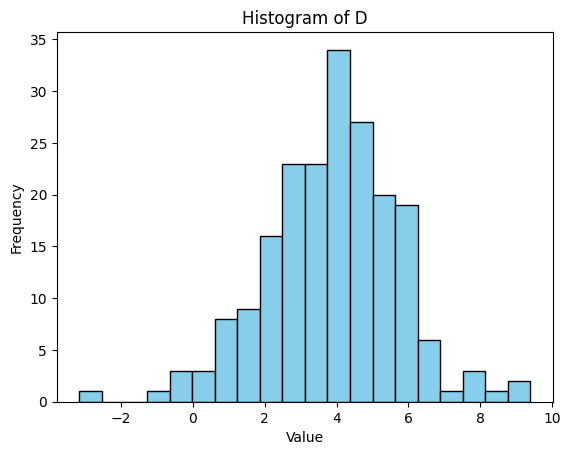

In [14]:
import matplotlib.pyplot as plt

# Ваши данные
Z = [-0.446584790913,6.86355998091,-1.76549845667,5.03261621241,2.83657823695,6.06844310176,6.13086503711,4.17390545601,9.24916448539,-0.668637990896,-0.869061479559,1.2073522402,-2.59905331132,-3.15066996361,4.02603956288,-0.665513707286,-0.377684709386,-2.93039363693,4.72056537216,1.54982053201,5.98095784994,2.9929446293,0.612329479455,-6.0333756427,5.3457555361,-2.07350827026,2.39601300347,-1.87484187283,3.62588309108,-2.36085162266,1.73519617398,6.20173937204,4.15508334629,4.87722785335,-1.32340512765,3.8812159451,-3.10211663662,-5.19518153501,-0.754185890619,1.33735774207,-3.03086014735,-6.59518865247,-0.0254148054433,4.71219967908,-1.36632919482,-3.42555874305,2.17886985096,0.999733463673,3.55042506167,1.46306069171,3.89874897496,3.10189036997,2.51554468804,-6.23670951284,-0.245339464639,2.76444728454,6.20781237816,-1.47644507541,-0.326347021775,5.24313328217,2.11947271,2.37226182866,-3.46526085438,-5.52929531389,1.97220243579,3.46245202858,4.84235670059,-1.23933963676,2.52057481149,-3.00212447839,1.01018142082,-8.92849226343,-1.20749752954,2.78835380984,-6.10788648726,4.96482421185,1.39783588053,1.43471543386,0.108448798888,2.41109062292,1.86552796086,2.70011301324,-1.26749119379,5.48339911606,-6.63196208972,-3.65267252051,1.23120361376,-0.812317415883,5.35009949318,-0.206368872157,0.0621515314538,-4.43688663449,-0.484832607861,-0.21889229213,-1.07761966901,0.999879814614,0.934924542726,3.88878652167,5.13533831695,3.51653737604,7.07288832585,-2.91857230865,2.75097807206,-4.22942642976,7.06802251868,4.42472519565,-2.12882388479,3.02644722611,0.276600891445,8.61353400882,-2.38378393337,-0.301650838815,-3.12053854458,6.70014649829,3.20443817138,-8.13704475284,2.29492465761,-5.77033086202,6.70240591701,1.27619637614,0.121054514359,0.476461293517,5.77845530964,-0.00886636038868,-2.57060370512,-0.946499440958,-0.260366692556,-5.28553951728,3.45387946052,-5.60934099704,-6.2113232549,-6.26593335795,2.84569941765,1.1621565758,2.58092233426,1.15570798649,4.97641233382,4.67773082083,-0.175952263047,3.92783781409,-4.42600849076,0.798322329752,-3.25618449742,-0.21042582753,8.52487591151,3.15413018799,-2.90445422243,11.4389077107,3.84812593057,2.74841304152,3.28887366301,0.413641831907,5.84333440683,1.81270008983,-3.27684147132,-5.55995520912,-2.8902012445,0.127438016975,-2.68727936377,1.60533019764,-2.84242889149,-3.40727990249,5.48637822522,5.67721879508,2.28348393701,4.82906495104,0.865144277335,-4.11226219478,0.816534973486,5.98258079178,3.00456216818,6.96201245375,5.38320423149,3.64206813965,-3.25667030846,2.28922188272,10.4362170536,-0.00846385757209,1.44867516102,-5.02054399297,-0.679656172104,0.313740873016,-2.46767358101,8.4406691847,5.81084876898,2.5584796121,-0.61910348737,-1.60200738241,0.711265765542,0.062322878034,5.35252488596,-1.32395121384,4.43881843719,3.0418197787,3.69401512845,8.33910525837,8.75742938344,0.266181712928,0.179777088018,-4.24193710422]
X = [5,7,7,10,12,14,6,13,13,11,11,7,15,12,12,12,7,11,10,11,11,11,10,3,12,6,10,10,7,11,8,12,3,7,12,7,4,13,11,7,9,15,9,9,12,11,10,9,11,3,12,8,9,13,14,9,14,8,8,8,8,11,13,8,11,16,5,17,7,20,8,10,8,8,7,12,16,13,11,9,7,11,13,13,6,12,7,7,8,8,6,15,11,14,7,11,6,5,7,6,15,8,10,7,10,12,8,13,13,15,11,11,9,14,9,11,8,14,14,7,10,15,10,10,7,7,9,13,11,15,11,13,16,9,5,10,6,9,3,10,11,5,5,13,13,9,12,12,11,9,10,10,8,5,8,8,10,9,12,5,11,16,13,11,11,13,12,10,7,13,2,17,6,6,13,9,7,12,18,8,8,12,15,12,17,8,6,16,6,11,10,8,14,7,6,9,10,10,6,9]
Y = [4.41093280453,4.76071247375,-0.393406324096,0.710337606411,2.94606113427,3.70952523734,-0.486096917133,3.77529027862,-0.589344166252,3.11478162602,0.24661990083,-0.915774529541,0.399703831113,2.91793978566,-0.69544654109,3.27267215749,4.47216168913,4.65865652207,0.247328807254,3.51624463673,1.69539925023,4.29129601289,-0.905167045048,3.66880449721,2.66826478729,1.72408658984,-0.474366150145,4.30017803344,0.723794246009,2.17190233136,4.02755895643,0.286811556882,4.18262938414,-0.220165994296,3.352863608,4.9761845494,4.59798194177,1.15493570586,4.64232315781,2.21887426496,-0.689892280671,-0.633472220449,3.29695650974,3.19299683095,3.22126149067,1.05417370797,4.8877269806,4.17488377742,3.79297334692,0.915615946838,3.68066085636,4.86365613995,4.05814383861,-0.215404184641,0.327884892456,3.04987972974,1.43842296028,4.60185394116,2.85330341951,-0.635336415703,1.59737359502,-0.167871526532,-0.0497738748602,1.14150547377,0.785188184305,1.35533529388,-0.922779683276,2.09561901957,4.29288768076,-0.151515060316,0.825609684893,2.99285074846,4.2611558854,-0.59464253544,1.54872087441,4.93990509012,4.79434164053,2.83087395818,2.53291065201,0.732676975238,1.73556553328,-0.713525006439,4.73682716786,4.18726205307,2.17803334454,4.71912436028,2.45093367292,2.1558538494,0.458287929479,4.71724401256,-0.878379838021,0.074387093037,4.68066009183,2.49795497609,1.02438203961,2.94726228088,1.68902213695,4.46007425031,1.93315589528,1.73326355448,2.23665281743,1.9517866833,3.47314680793,4.3177191615,0.20553857212,0.925922986957,2.99658172896,2.22553897893,0.380133519451,4.15676544423,4.18811755188,1.33351877297,4.77177697621,-0.768488835042,1.62410297311,3.81314513178,0.519835192383,3.87721432052,0.106483747667,0.532779693303,0.276857852209,2.08602624583,-0.742484487326,-0.819921224123,2.78360002012,4.38803114419,0.289857551121,1.470156411,2.92259484645,2.98859348375,3.46937648281,1.32120634383,1.34329769078,0.291254178334,-0.206497437231,0.204807702742,3.88345342089,0.245187883964,2.9095507131,0.371257415716,0.87264115291,1.04479290003,-0.0373568247459,0.0375370978293,3.12442127277,3.25161886846,0.581664284246,2.57768736997,4.67163737726,2.85890831369,1.88587397739,0.321999440891,-0.560951533272,0.0617857884422,-0.0466454210008,2.56269508285,3.80097691441,3.17453655958,4.7658451795,3.70753202886,-0.960907783569,2.08376568345,1.77041943087,-0.284687765208,1.34331018195,4.43162773046,1.32704280133,0.773023056715,-0.611673082162,3.57393195051,-0.223048153453,3.77743206482,1.40714290351,1.60962559327,-0.164117394868,4.03214654483,2.0065413409,2.98261145275,1.3603013495,-0.281928262179,-0.0251685620926,0.0971406083006,-0.871778773962,1.34066293226,1.96239295378,0.778269017198,1.67100071132,-0.119244135182,3.61390351274,2.06318939885,2.06748559444,0.41777138974,4.26936239329,1.22065940708,4.2935752377,4.67286242059,3.36957711741,0.240759403929,2.49367238667,2.20328875046]
D = [2.29106893237,2.26403892097,6.2446633167,4.93176295377,7.09973553507,5.84190076275,2.91330742621,2.57308785442,5.6869144632,3.93707283059,3.93264067442,1.23962711663,5.92816588081,0.581310339931,2.49878223168,4.42584857266,3.49898148888,6.21364616744,3.25898170282,1.94131808365,2.96677343358,0.659741263411,3.86031145306,9.3666796951,8.24459611291,4.09220004134,5.37452862445,3.13882468173,4.11122173603,0.821461514186,1.68323605285,4.19761005136,3.95725973395,2.8609219217,2.68274392059,2.4003848785,4.26325289,2.5649356191,3.43856907433,-0.538190802425,1.75420235677,7.71678561833,0.798787047917,2.4360008161,4.73973356807,6.82361363062,4.39184490587,4.3084153142,6.386130936,6.62243894369,6.45107547269,1.5908026934,4.21369497931,4.22386242803,2.04668932594,6.16359705613,3.00290165295,5.36868575955,5.45289249694,5.25748441637,0.854327294099,2.98104069695,-0.906781451662,6.01869463603,6.39252059987,5.32627669441,3.08171241758,1.55856342896,4.25735001619,4.58761357451,4.06579591448,5.16454770286,5.68891593981,3.57863598436,4.56023660632,3.25232371118,5.77108364008,2.03424375966,4.12033429679,5.30654271053,3.60168565262,4.00852550948,3.87609131575,4.92368031545,2.47706932781,4.12559834465,3.83740051376,6.19007173018,5.54866779539,3.85911984464,5.78379334795,2.6106290677,3.70107333278,4.4480199468,2.80946277543,3.91595268754,3.69526841579,5.08263234991,2.83853013513,4.56256981337,-0.0990200850857,5.49396138122,3.81375229905,6.02800623977,5.04723833063,5.19108977244,4.93166811013,3.94996447786,2.09122440706,5.58352321149,1.76235444754,0.687902390455,9.40034597862,3.90031851624,4.66853453111,3.95885204015,4.67091515234,2.65800659385,2.46596735383,6.01718943957,2.23501287594,4.34057052755,4.47605810844,3.6169140101,5.07961062785,3.9313569109,3.10307345473,3.14798092339,3.99360992117,3.15387309597,5.08153540746,4.93200276959,3.13595577552,4.7898447788,3.58858222531,0.849263712182,2.72882701337,5.25185003134,4.97964627689,1.82587131482,4.98551578131,0.291661479713,4.71002970446,3.6719721177,3.39311964905,2.44986199694,3.07573083838,2.81492940053,4.87307626853,3.9604570183,1.13029273173,4.82053698751,1.32654701727,7.84993225841,4.12777568255,3.40927235632,5.79027259845,0.802078248036,4.12200287544,2.44315413193,5.95786851881,2.24412800208,6.70453282764,2.86035816443,5.82231338817,4.2488210453,2.2595308785,5.09681669192,2.3652351624,4.42603453088,3.42992742979,4.91407089281,4.69591396749,3.31654416171,8.03286461231,6.06914894206,2.95791637169,2.91747025301,4.30917748622,3.2359712866,5.16293255691,6.20587331612,0.193329476264,3.47222227364,4.01633869097,4.4995946619,4.46669620218,-3.16290716318,5.92328009802,5.53693447068,2.82024823135,4.24260693696,3.15279329672,-0.575154108122,4.4948177318,2.6877013137,3.38441889758,1.29226692427,5.42852280974,4.86122623556]

# Построение гистограммы
plt.hist(D, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of D')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

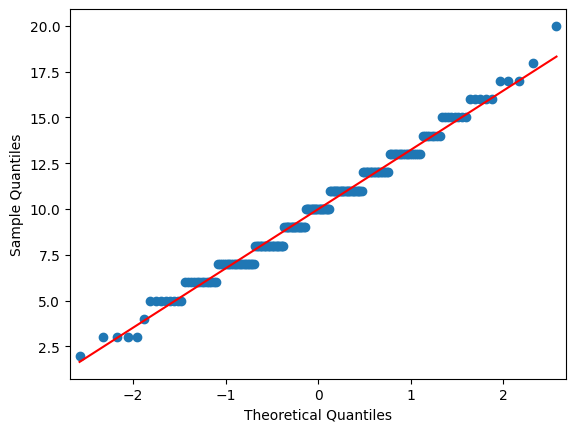

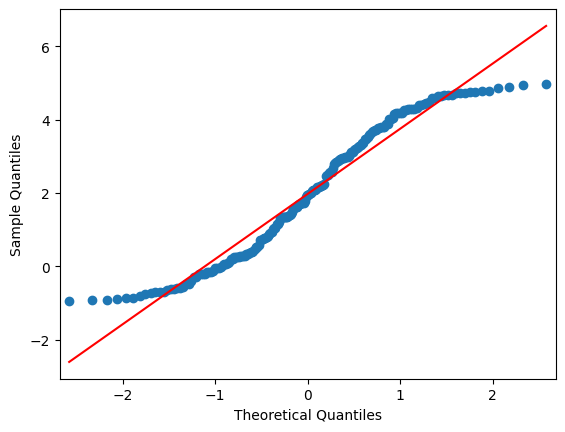

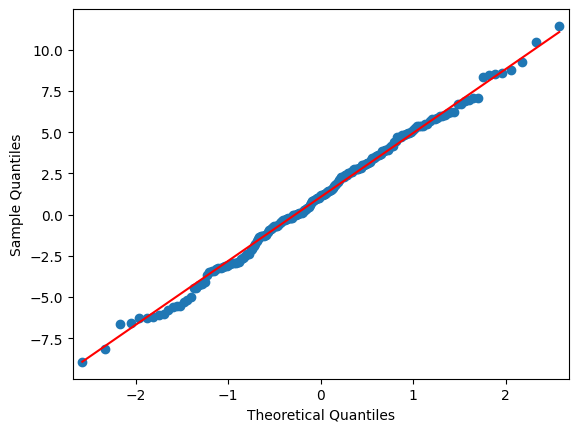

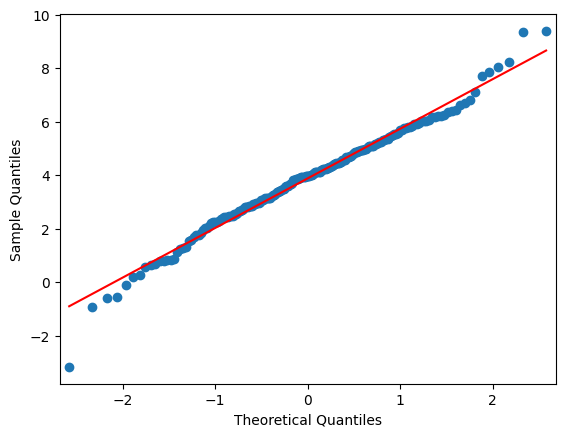

In [8]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df["X"], line='s')
qqplot(df["Y"], line='s')
qqplot(df["Z"], line='s')
qqplot(df["D"], line='s')
pyplot.show

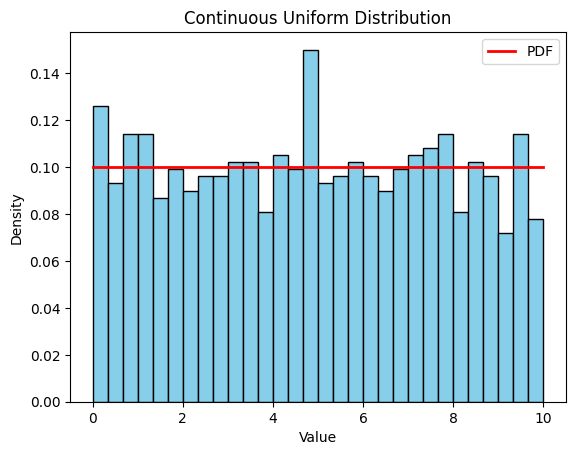

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры равномерного распределения
a = 0  # Нижний предел интервала
b = 10  # Верхний предел интервала

# Генерируем 1000 случайных чисел из равномерного распределения
data = np.random.uniform(a, b, 1000)

# Построение гистограммы
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black')

# Построение графика плотности вероятности
x = np.linspace(a, b, 1000)
plt.plot(x, np.ones_like(x) / (b - a), color='red', lw=2, label='PDF')

plt.title('Continuous Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



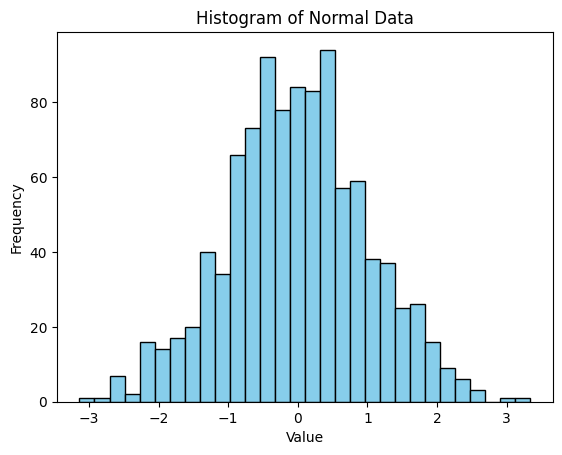

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Смоделируем данные с нормальным распределением
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение
data = np.random.normal(loc=mean, scale=std_dev, size=1000)

# Построим гистограмму
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()





In [45]:
from scipy.stats import wilcoxon

X = df["X"]
Y = df["Y"]
# Проверка однородности массивов X и Y с помощью критерия Уилкоксона
statistic, p_value = wilcoxon(X, Y)

print("Критерий Уилкоксона:")
print("Статистика:", statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем гипотезу о равенстве медиан")
else:
    print("Не можем отвергнуть гипотезу о равенстве медиан")


Критерий Уилкоксона:
Статистика: 15.0
p-значение: 1.7998606112922388e-34
Отвергаем гипотезу о равенстве медиан


In [46]:
from scipy.stats import mannwhitneyu

# Проверка однородности массивов X и Y с помощью критерия Манна-Уитни
statistic, p_value = mannwhitneyu(X, Y)

print("Критерий Манна-Уитни:")
print("Статистика:", statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем гипотезу о равенстве распределений")
else:
    print("Не можем отвергнуть гипотезу о равенстве распределений")


Критерий Манна-Уитни:
Статистика: 39604.0
p-значение: 1.4768098049370635e-64
Отвергаем гипотезу о равенстве распределений


In [47]:
from scipy.stats import ranksums

# Проверка однородности массивов X и Y с помощью критерия Уилкоксона
statistic, p_value = ranksums(X, Y)

print("Критерий Уилкоксона:")
print("Статистика:", statistic)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Отвергаем гипотезу о равенстве распределений")
else:
    print("Не можем отвергнуть гипотезу о равенстве распределений")


Критерий Уилкоксона:
Статистика: 16.95637977171405
p-значение: 1.7266008845117972e-64
Отвергаем гипотезу о равенстве распределений
